In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Data Visualization - EDA :

In [107]:
df=pd.read_csv(r'df_1.csv') #Outliers removed
print(df.shape) 
df.head()

(990, 13)


,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


### Age - Readmitted :

In [108]:
bins = [20, 30, 40, 50, 60, 70, 80]
df['Age_Group'] = pd.cut(df['Age'], bins)
df['Age_Group'] = df['Age_Group'].astype(str)

<Axes: xlabel='Age', ylabel='Count'>

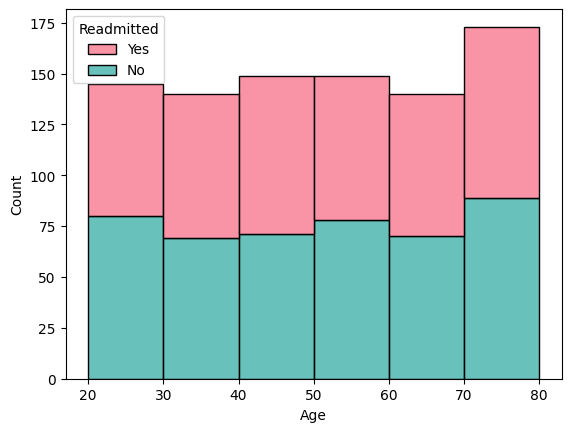

In [10]:
sns.histplot(x='Age', data=df, hue='Readmitted', bins=bins, multiple="stack", palette='husl', edgecolor='black')

In [116]:
descriptive_stats = df.groupby(['Age_Group', 'Readmitted'])['Age'].count()
descriptive_stats=descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Age_Group,Readmitted,Count,Probability
0,"(20, 30]",No,79,0.157371
1,"(20, 30]",Yes,65,0.133197
2,"(30, 40]",No,70,0.139442
3,"(30, 40]",Yes,74,0.151639
4,"(40, 50]",No,74,0.147410
5,"(40, 50]",Yes,81,0.165984
6,"(50, 60]",No,70,0.139442
7,"(50, 60]",Yes,63,0.129098
8,"(60, 70]",No,75,0.149402
9,"(60, 70]",Yes,72,0.147541


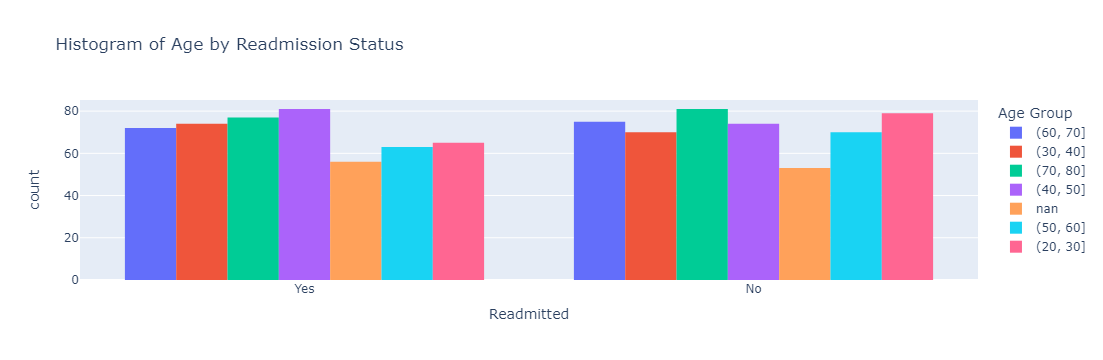

In [117]:
fig = px.histogram(df, x='Readmitted', color='Age_Group', barmode='group',
                   labels={'Age_Group': 'Age Group', 'Readmitted': 'Readmitted'},
                   title='Histogram of Age by Readmission Status')
fig.show()

### Gender - Age_Group - Readmitted :

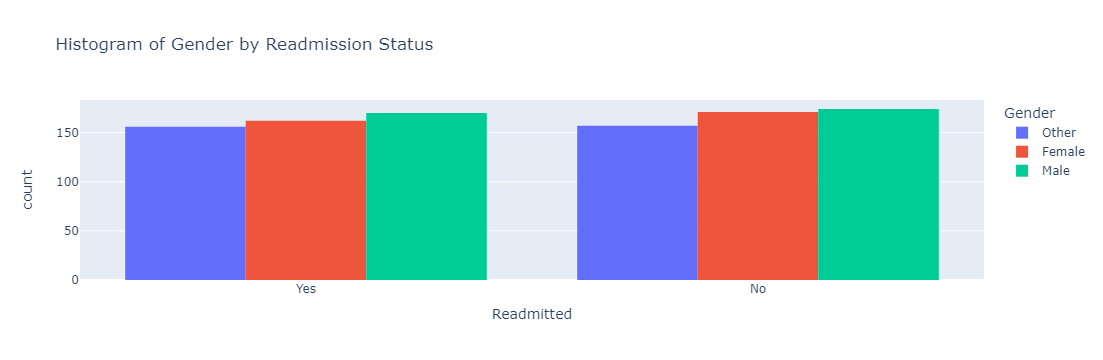

In [118]:
fig = px.histogram(df, x='Readmitted', color='Gender', barmode='group',
                   labels={'Gender': 'Gender', 'Readmitted': 'Readmitted'},
                   title='Histogram of Gender by Readmission Status')
fig.show()

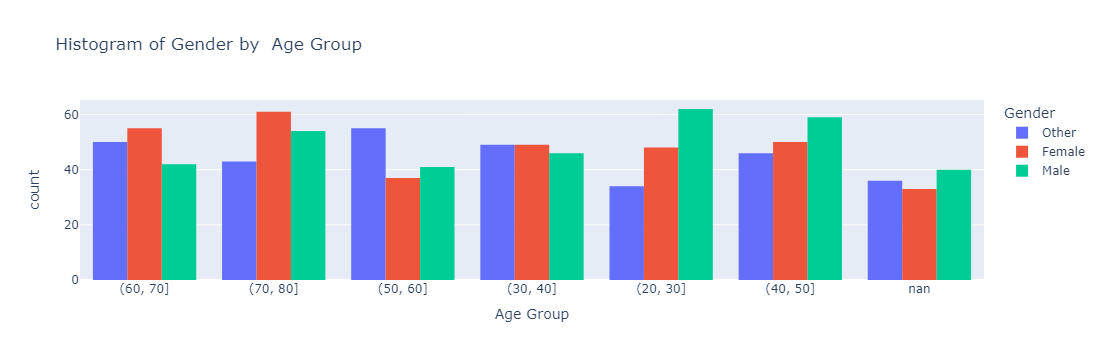

In [119]:
fig = px.histogram(df, x='Age_Group', color='Gender', barmode='group',
                   labels={'Gender': 'Gender', 'Age_Group': 'Age Group'},
                   title='Histogram of Gender by  Age Group')
fig.show()

In [120]:
descriptive_stats = df.groupby(['Gender', 'Readmitted','Age_Group'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Gender,Readmitted,Age_Group,Count,Probability
0,Female,No,"(20, 30]",27,0.053785
1,Female,No,"(30, 40]",21,0.041833
2,Female,No,"(40, 50]",22,0.043825
3,Female,No,"(50, 60]",23,0.045817
4,Female,No,"(60, 70]",28,0.055777
5,Female,No,"(70, 80]",35,0.069721
6,Female,No,nan,15,0.029880
7,Female,Yes,"(20, 30]",21,0.043033
8,Female,Yes,"(30, 40]",28,0.057377
9,Female,Yes,"(40, 50]",28,0.057377


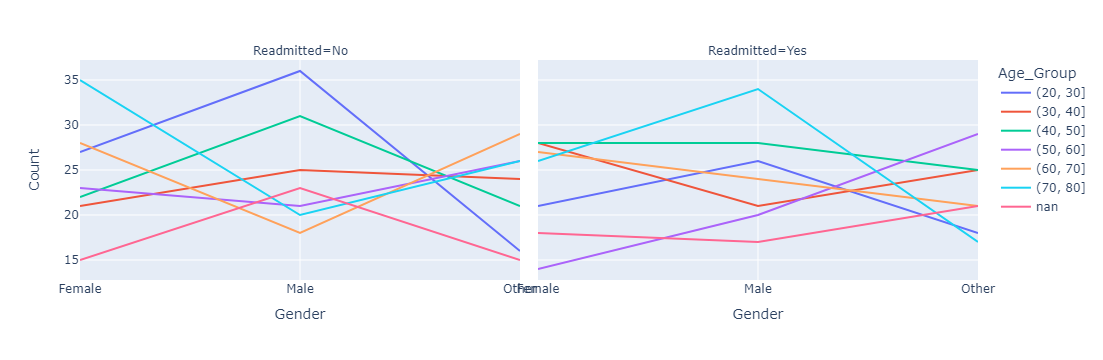

In [87]:
fig = px.line(descriptive_stats, x="Gender", y="Count",color='Age_Group',facet_col='Readmitted')
fig.show()

### Admission_Type - Readmitted :

In [121]:
descriptive_stats = df.groupby(['Admission_Type', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Admission_Type,Readmitted,Count,Probability
0,Elective,No,175,0.348606
1,Elective,Yes,167,0.342213
2,Emergency,No,166,0.330677
3,Emergency,Yes,168,0.344262
4,Urgent,No,161,0.320717
5,Urgent,Yes,153,0.313525


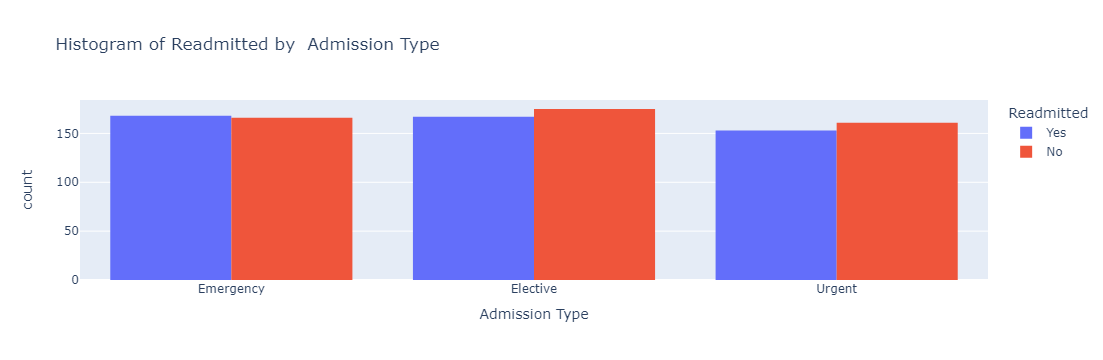

In [122]:
fig = px.histogram(df, x='Admission_Type', color='Readmitted', barmode='group',
                   labels={'Admission_Type': 'Admission Type', 'Readmitted': 'Readmitted'},
                   title='Histogram of Readmitted by  Admission Type')
fig.show()

### Diagnosis - Readmitted :

In [123]:
descriptive_stats = df.groupby(['Diagnosis', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Diagnosis,Readmitted,Count,Probability
0,Diabetes,No,139,0.276892
1,Diabetes,Yes,126,0.258197
2,Heart Disease,No,120,0.239044
3,Heart Disease,Yes,117,0.239754
4,Infection,No,127,0.252988
5,Infection,Yes,119,0.243852
6,Injury,No,116,0.231076
7,Injury,Yes,126,0.258197


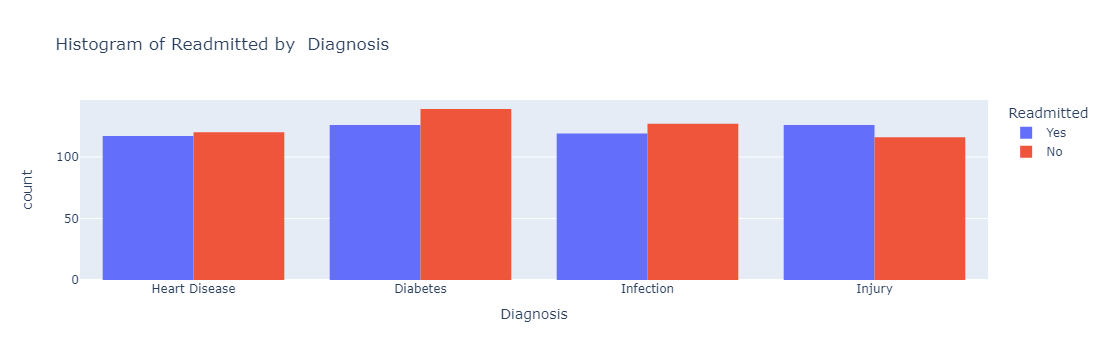

In [124]:
fig = px.histogram(df, x='Diagnosis', color='Readmitted', barmode='group',
                   labels={'Diagnosis': 'Diagnosis', 'Readmitted': 'Readmitted'},
                   title='Histogram of Readmitted by  Diagnosis')
fig.show()

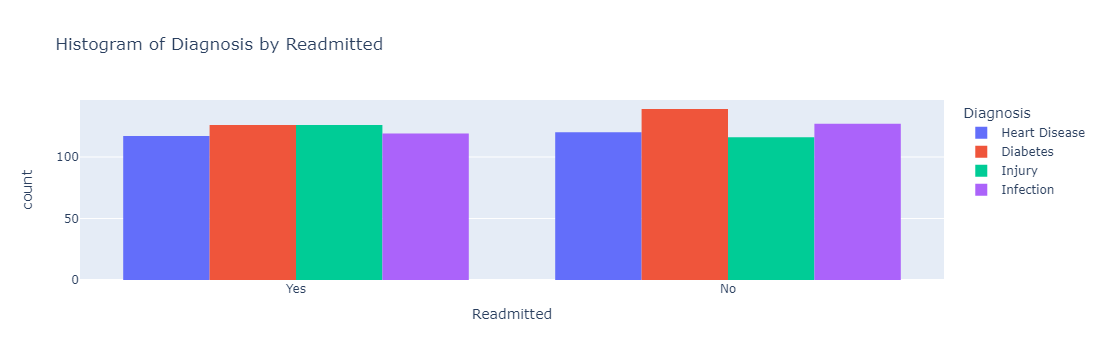

In [125]:
fig = px.histogram(df, x='Readmitted', color='Diagnosis', barmode='group',
                   labels={'Diagnosis': 'Diagnosis', 'Readmitted': 'Readmitted'},
                   title='Histogram of Diagnosis by Readmitted')
fig.show()

In [126]:
descriptive_stats = df.groupby(['Admission_Type', 'Diagnosis','Readmitted','Gender'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats.to_csv(r'df_5.csv',index=False)

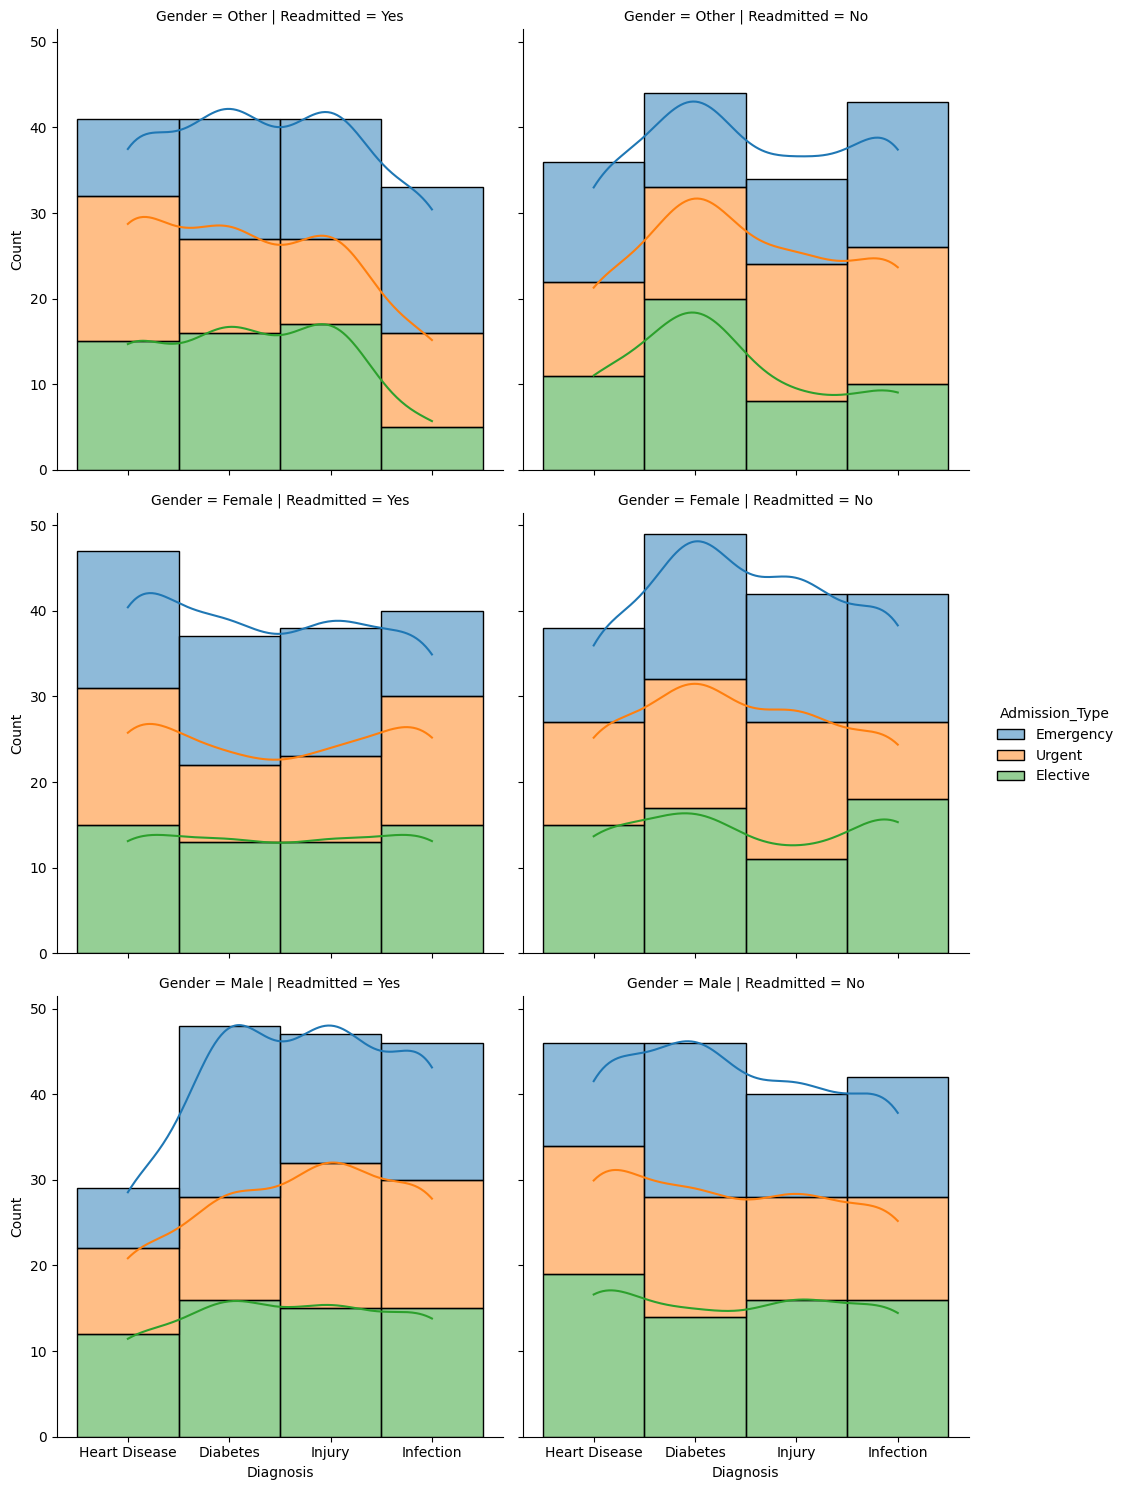

In [127]:
sns.displot(data=df, x="Diagnosis",kde=True, hue='Admission_Type', col="Readmitted", row='Gender',multiple="stack")

### Num_Lab_Procedures - Readmitted :

In [128]:
descriptive_stats = df.groupby(['Num_Lab_Procedures', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Lab_Procedures,Readmitted,Count,Probability
0,1,No,3,0.005976
1,1,Yes,8,0.016393
2,2,No,7,0.013944
3,2,Yes,1,0.002049
4,3,No,5,0.009960
...,...,...,...,...
189,97,Yes,1,0.002049
190,98,No,4,0.007968
191,98,Yes,4,0.008197
192,99,No,4,0.007968


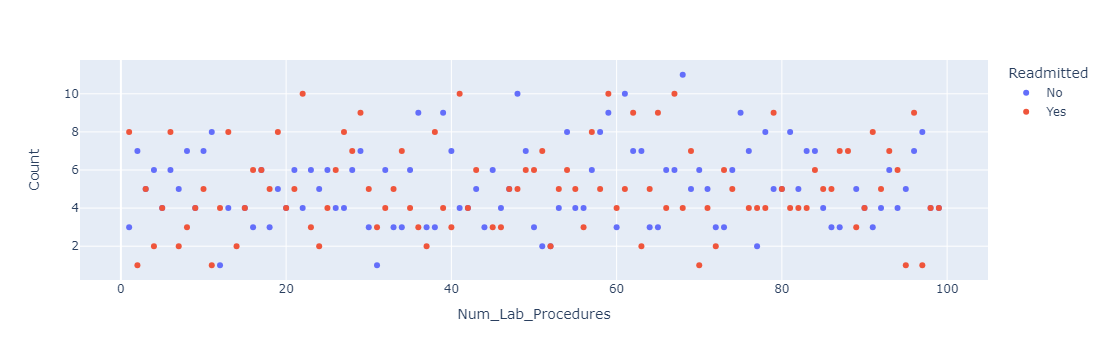

In [129]:
fig = px.scatter(descriptive_stats, x="Num_Lab_Procedures", y="Count",color='Readmitted')
fig.show()

In [130]:
descriptive_stats = df.groupby(['Num_Lab_Procedures', 'Readmitted','Age_Group'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Lab_Procedures,Readmitted,Age_Group,Count,Probability
0,1,No,"(50, 60]",1,0.001992
1,1,No,"(60, 70]",1,0.001992
2,1,No,nan,1,0.001992
3,1,Yes,"(40, 50]",3,0.006148
4,1,Yes,"(50, 60]",2,0.004098
...,...,...,...,...,...
694,99,No,"(50, 60]",1,0.001992
695,99,No,"(70, 80]",1,0.001992
696,99,Yes,"(30, 40]",1,0.002049
697,99,Yes,"(40, 50]",1,0.002049


### Num_Medications - Readmitted : 

In [131]:
descriptive_stats = df.groupby(['Num_Medications', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Medications,Readmitted,Count,Probability
0,1,No,9,0.017928
1,1,Yes,11,0.022541
2,2,No,13,0.025896
3,2,Yes,13,0.026639
4,3,No,14,0.027888
5,3,Yes,20,0.040984
6,4,No,12,0.023904
7,4,Yes,14,0.028689
8,5,No,19,0.037849
9,5,Yes,11,0.022541


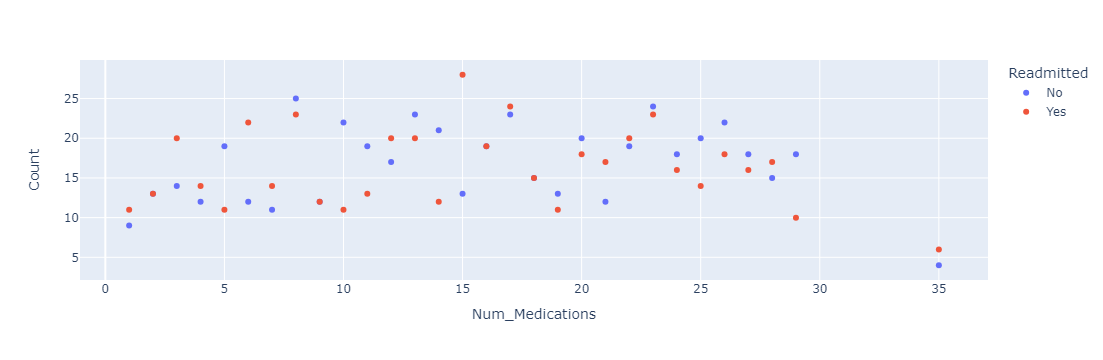

In [132]:
fig = px.scatter(descriptive_stats, x="Num_Medications", y="Count",color='Readmitted')
fig.show()

In [133]:
descriptive_stats = df.groupby(['Num_Medications', 'Readmitted','Age_Group'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats.to_csv(r'df_3.csv',index=False)
descriptive_stats

,Num_Medications,Readmitted,Age_Group,Count,Probability
0,1,No,"(30, 40]",2,0.003984
1,1,No,"(40, 50]",1,0.001992
2,1,No,"(50, 60]",3,0.005976
3,1,No,"(60, 70]",1,0.001992
4,1,No,"(70, 80]",2,0.003984
...,...,...,...,...,...
364,35,Yes,"(20, 30]",2,0.004098
365,35,Yes,"(30, 40]",1,0.002049
366,35,Yes,"(50, 60]",1,0.002049
367,35,Yes,"(70, 80]",1,0.002049


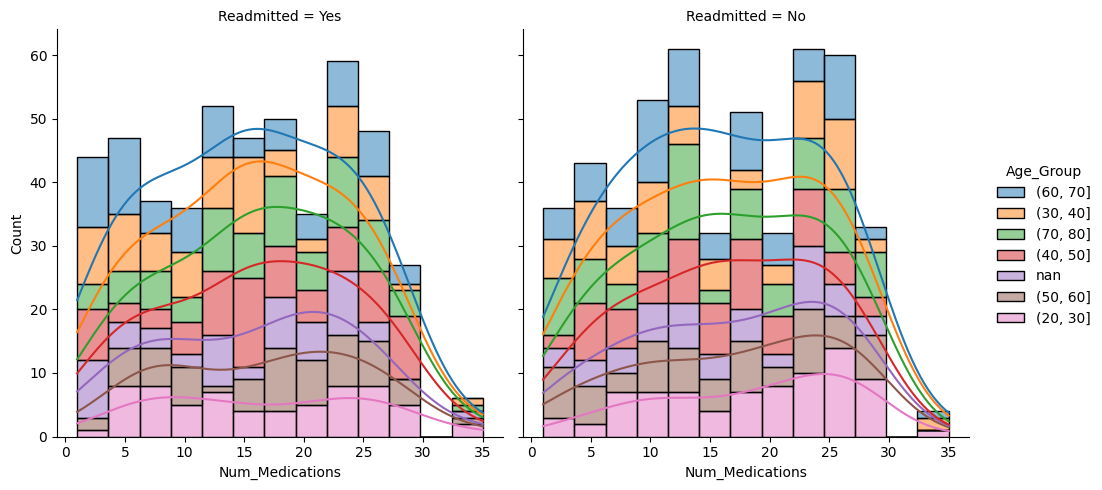

In [134]:
sns.displot(data=df, x="Num_Medications",kde=True, hue='Age_Group', col="Readmitted", multiple="stack")

In [136]:
descriptive_stats = df.groupby(['Num_Medications', 'Readmitted','Gender'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats.to_csv(r'df_4.csv',index=False)
descriptive_stats

,Num_Medications,Readmitted,Gender,Count,Probability
0,1,No,Female,4,0.007968
1,1,No,Male,3,0.005976
2,1,No,Other,2,0.003984
3,1,Yes,Female,6,0.012295
4,1,Yes,Male,1,0.002049
...,...,...,...,...,...
172,29,Yes,Other,1,0.002049
173,35,No,Female,3,0.005976
174,35,No,Other,1,0.001992
175,35,Yes,Female,3,0.006148


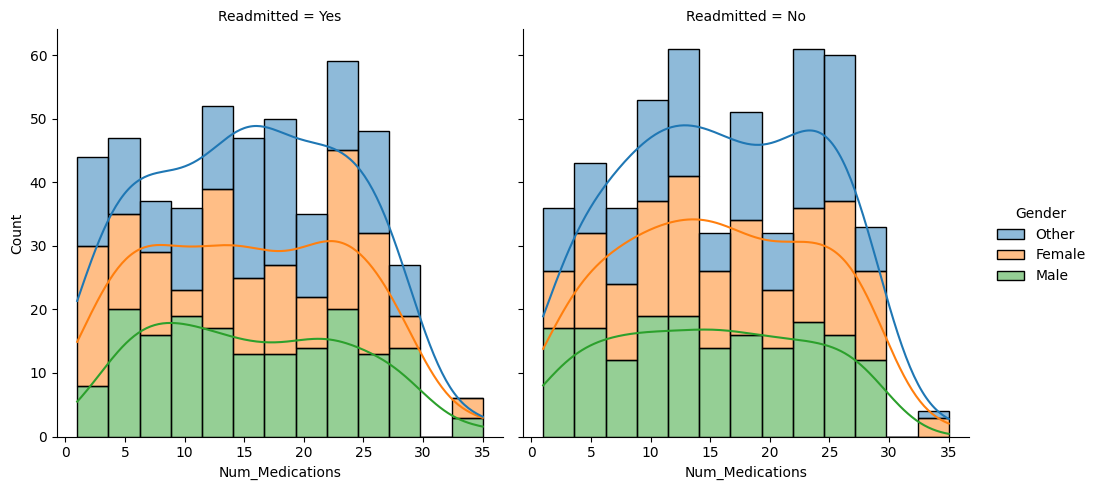

In [59]:
sns.displot(data=df, x="Num_Medications",kde=True, hue='Gender', col="Readmitted", multiple="stack")

### Num_Outpatient_Visits - Readmitted :

In [137]:
descriptive_stats = df.groupby(['Num_Outpatient_Visits', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Outpatient_Visits,Readmitted,Count,Probability
0,0,No,94,0.187251
1,0,Yes,95,0.194672
2,1,No,113,0.225100
3,1,Yes,84,0.172131
4,2,No,109,0.217131
5,2,Yes,98,0.200820
6,3,No,97,0.193227
7,3,Yes,104,0.213115
8,4,No,89,0.177291
9,4,Yes,107,0.219262


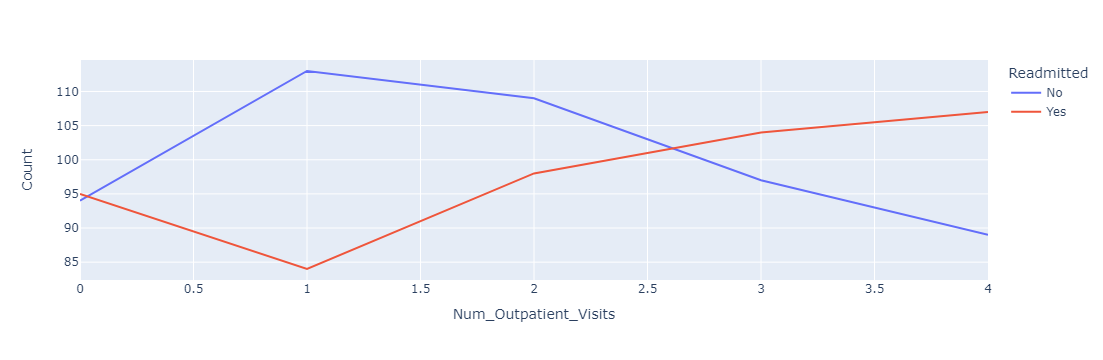

In [138]:
fig = px.line(descriptive_stats, x="Num_Outpatient_Visits", y="Count",color='Readmitted')
fig.show()

### Num_Inpatient_Visits - Readmitted :

In [140]:
descriptive_stats = df.groupby(['Num_Inpatient_Visits', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Inpatient_Visits,Readmitted,Count,Probability
0,0,No,92,0.183267
1,0,Yes,92,0.188525
2,1,No,115,0.229084
3,1,Yes,112,0.229508
4,2,No,79,0.157371
5,2,Yes,93,0.190574
6,3,No,105,0.209163
7,3,Yes,98,0.200820
8,4,No,111,0.221116
9,4,Yes,93,0.190574


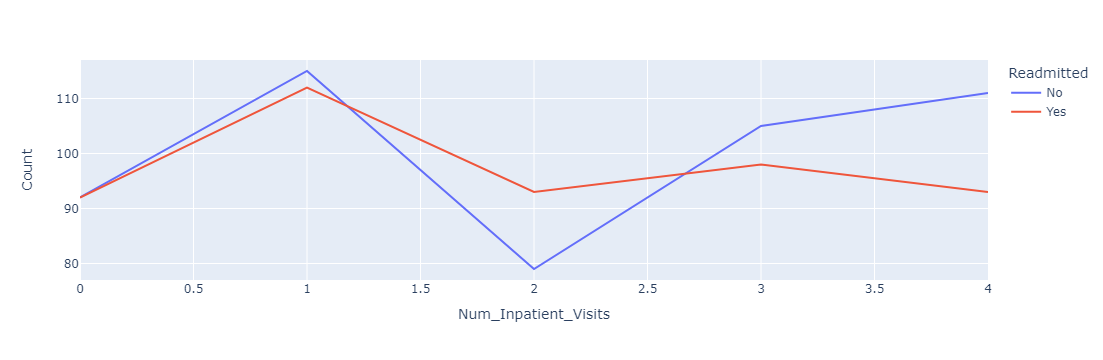

In [141]:
fig = px.line(descriptive_stats, x="Num_Inpatient_Visits", y="Count",color='Readmitted')
fig.show()

### Num_Emergency_Visits - Readmitted :

In [142]:
descriptive_stats = df.groupby(['Num_Emergency_Visits', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Emergency_Visits,Readmitted,Count,Probability
0,0,No,94,0.187251
1,0,Yes,100,0.204918
2,1,No,112,0.223108
3,1,Yes,119,0.243852
4,2,No,111,0.221116
5,2,Yes,80,0.163934
6,3,No,96,0.191235
7,3,Yes,86,0.176230
8,4,No,89,0.177291
9,4,Yes,103,0.211066


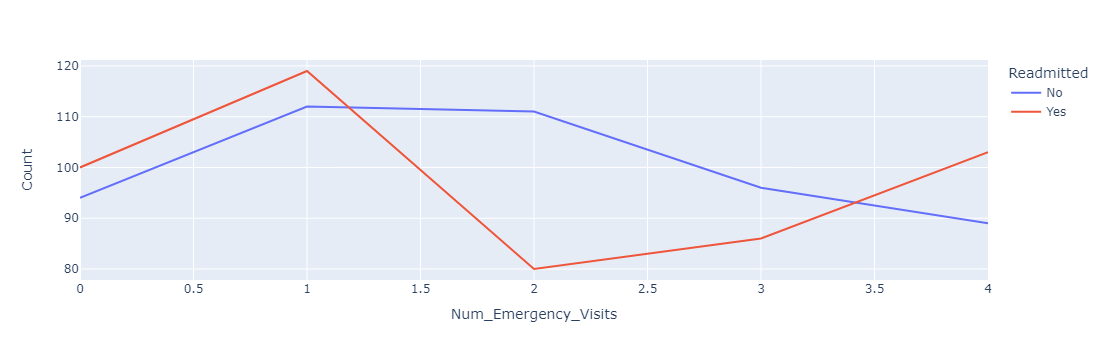

In [143]:
fig = px.line(descriptive_stats, x="Num_Emergency_Visits", y="Count",color='Readmitted')
fig.show()

### Num_Diagnoses - Readmitted :

In [144]:
descriptive_stats = df.groupby(['Num_Diagnoses', 'Readmitted'])['Patient_ID'].count()
descriptive_stats = descriptive_stats.reset_index(name='Count')
descriptive_stats['Probability'] = descriptive_stats['Count'] / descriptive_stats.groupby('Readmitted')['Count'].transform('sum')
descriptive_stats

,Num_Diagnoses,Readmitted,Count,Probability
0,1,No,71,0.141434
1,1,Yes,58,0.118852
2,2,No,61,0.121514
3,2,Yes,48,0.098361
4,3,No,51,0.101594
5,3,Yes,45,0.092213
6,4,No,54,0.107570
7,4,Yes,58,0.118852
8,5,No,46,0.091633
9,5,Yes,44,0.090164


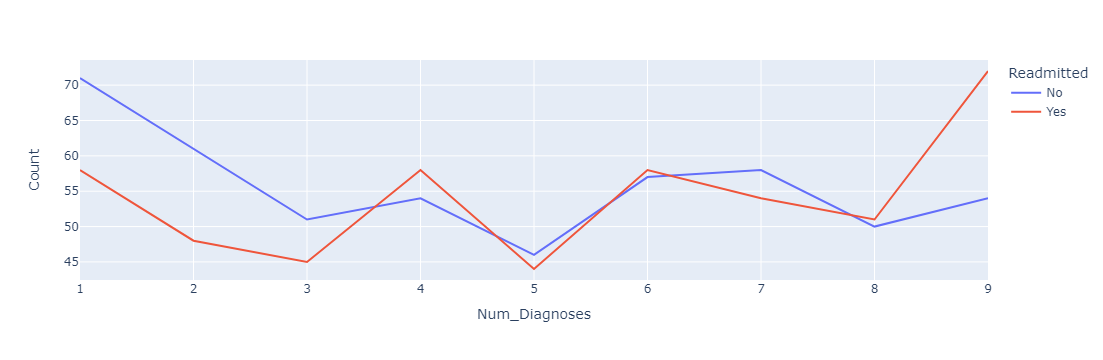

In [145]:
fig = px.line(descriptive_stats, x="Num_Diagnoses", y="Count",color='Readmitted')
fig.show()

## Feature Elimination :

In [93]:
df=pd.read_csv(r'df_2.csv')
df.head()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Gender_Female,...,Gender_Other,Admission_Type_Elective,Admission_Type_Emergency,Admission_Type_Urgent,Diagnosis_Diabetes,Diagnosis_Heart Disease,Diagnosis_Infection,Diagnosis_Injury,Readmitted_No,Readmitted_Yes
0,1,69,33,2,4,1,1,5,NaN,0,...,1,0,1,0,0,1,0,0,0,1
1,2,32,81,10,4,4,1,6,NaN,1,...,0,0,0,1,1,0,0,0,1,0
2,3,78,75,29,4,0,3,5,Normal,1,...,0,0,0,1,0,1,0,0,1,0
3,4,38,77,11,2,3,4,9,NaN,0,...,0,1,0,0,1,0,0,0,0,1
4,5,41,50,25,3,4,1,3,NaN,1,...,0,0,0,1,1,0,0,0,0,1


In [94]:
data=df.iloc[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,20]]
data.head()

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Gender_Female,Gender_Male,Gender_Other,Admission_Type_Elective,Admission_Type_Emergency,Admission_Type_Urgent,Diagnosis_Diabetes,Diagnosis_Heart Disease,Diagnosis_Infection,Diagnosis_Injury,Readmitted_Yes
0,69,33,2,4,1,1,5,0,0,1,0,1,0,0,1,0,0,1
1,32,81,10,4,4,1,6,1,0,0,0,0,1,1,0,0,0,0
2,78,75,29,4,0,3,5,1,0,0,0,0,1,0,1,0,0,0
3,38,77,11,2,3,4,9,0,1,0,1,0,0,1,0,0,0,1
4,41,50,25,3,4,1,3,1,0,0,0,0,1,1,0,0,0,1


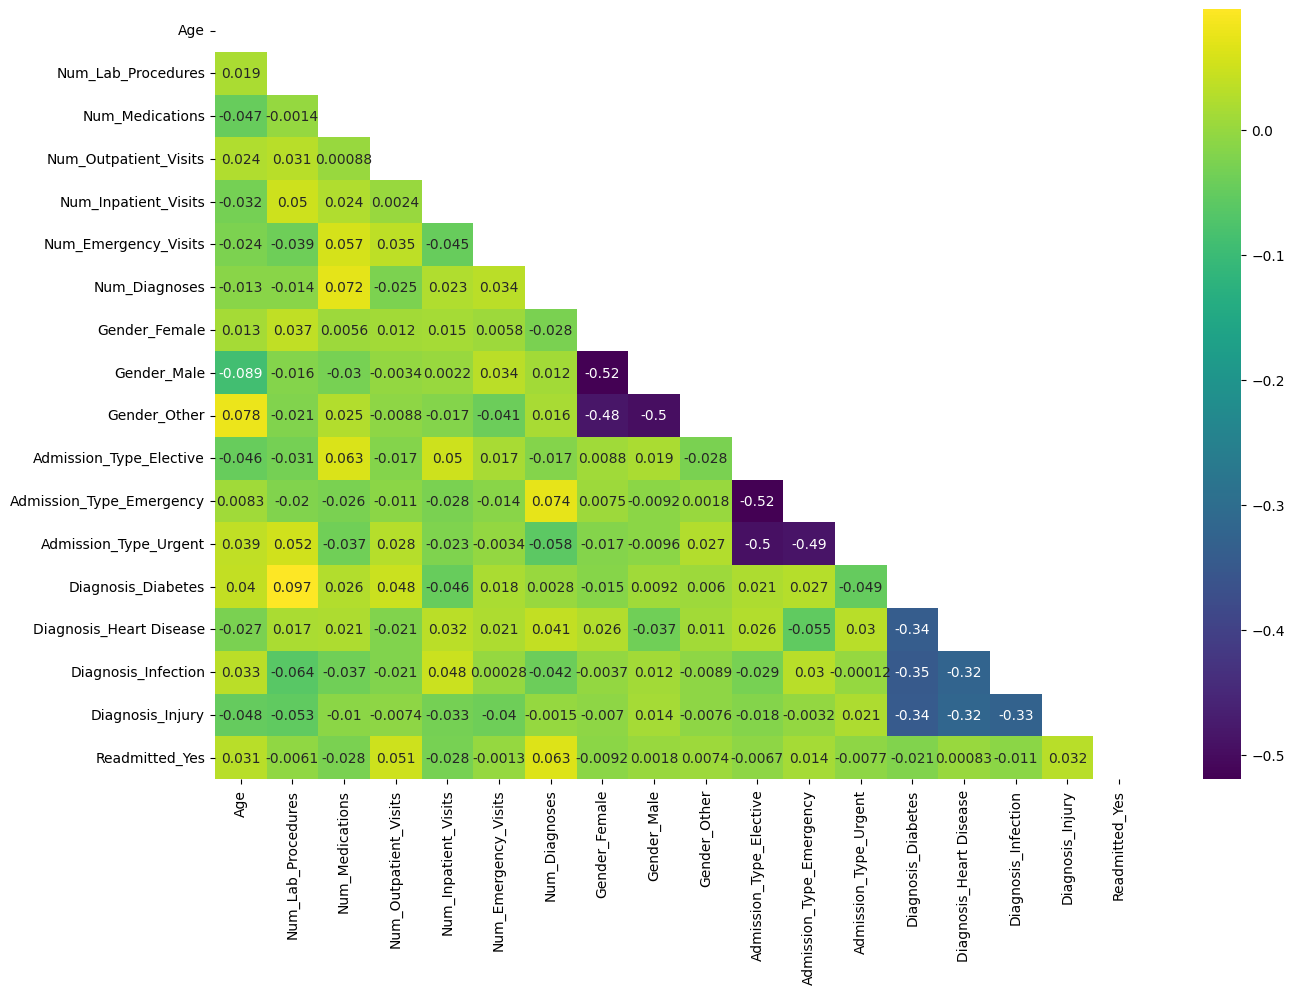

In [105]:
mask = np.triu(np.ones_like(data.corr()))
fig, ax = plt.subplots(figsize=(15, 10))
dataplot = sns.heatmap(data.corr(), cmap="viridis", annot=True, mask=mask,ax=ax)
plt.show()

## Final thoughts & Insights :
- Male are getting readmitted more than female and others
- If the Num_Medications is more than 30, then all "Male" are likely to get readmitted.
- If the Num_Medications is more than 30, then all "Other"(Gender) are NOT likely to get readmitted.
- If the Num_Medications is more than 30 and the age group of a person is between 20 and 30, then there is a high chance of 66.6% for him/ her to get readmitted.
- If the Num_Outpatient_Visits increases, the chance of getting readmitted also increases (ie) Num_Outpatient_Visits are directly proportional to Readmitted_Yes columns
- There is a high probability of 16.59% for people of age 40-50 to get readmitted (Count=81) than any other age groups.- 
There is a high probability of 16.13% for people of age 70-80 to NOT get readmitted (Count=81) than any other age groups

